In [409]:
#ИМПОРТ БИБЛИОТЕК

In [410]:
import pandas as pd
import numpy as np 
import sklearn 
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import recall_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor

In [411]:
#СОЗДАНИЕ КЛАССОВ

In [412]:
class Cluster(BaseEstimator, TransformerMixin):  

    def __init__(self, n_clusters = 3):
        self.n_clusters = n_clusters
        self.method = KMeans(n_clusters = self.n_clusters, random_state = 0)
        
        
    def fit(self, X, y=None):
        self.method.fit(X)       
        return self
    


    def transform(self, X, y=None):
        res = self.method.predict(X)
        X['cluster'] =  res
        return (X)

In [413]:
#ИЗВЛЕЧЕНИЕ И ПРОСМОТР ДАННЫХ

In [414]:
data = pd.read_csv("C:/heart.csv") 
data.head(500)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [415]:
data.info() #0= less chance of heart attack 1= more chance of heart attack

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [416]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(data[column].value_counts(dropna=False))

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
sex
1    207
0     96
Name: sex, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     

In [417]:
#ПОСТРОЕНИЕ ГРАФИКОВ РАСПРЕДЕЛНИЯ ДАННЫХ

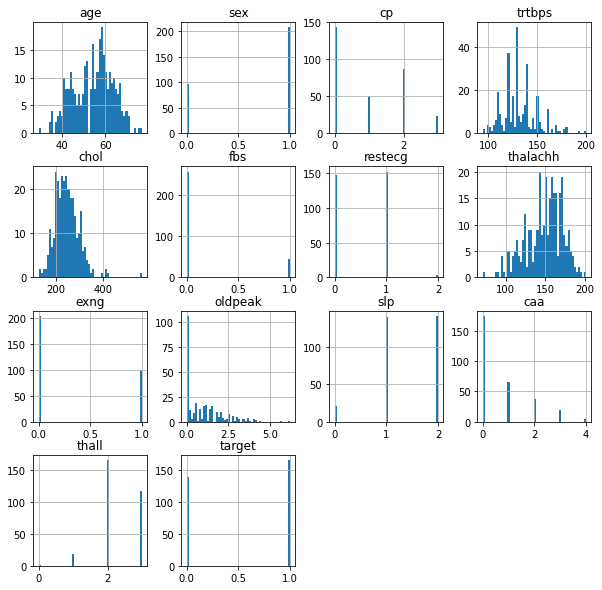

In [418]:
data.hist(bins=50, figsize=(10,10))
plt.show()

In [419]:
#ПОСТРОЕНИЕ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ

In [420]:
corr_matrix = data.corr()
corr_matrix['target'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [421]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [422]:
#ФОРМИРОВАНИЕ ФИЧ И ТАРГЕТА, УДАЛЕНИЕ СТОЛБЦОВ СЛАБОКОРРЕЛИРУЮЩИХ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 
#(НЕ ДАЛО УЛУЧШЕНИЙ, ПОЭТОМУ БЫЛО ПРИНЯТО РЕШЕНИЕ ОСТАВИТЬ ИХ, НО ПЕРЕД ОБУЧЕНИЕМ ВОСПОЛЬЗОВАТЬСЯ PCA) 

In [423]:
features = data.drop('target', axis = 1)
labels = data['target']
features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [424]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [425]:
#ПОСТРОЕНИЕ ГРАФИКА РАСПРЕДЕЛЕНИЯ ОБРАЗЦОВ В ДАТАСЕТЕ 

In [426]:
scaler = StandardScaler()
features_sc = scaler.fit_transform(features)

In [427]:
pca = PCA(n_components=2)
features_sc_pca = pca.fit_transform(features_sc)
features_sc_pca

array([[ 6.24110729e-01,  2.32127028e+00],
       [-4.55987975e-01, -9.57350982e-01],
       [-1.82880491e+00,  4.28847737e-02],
       [-1.71600605e+00, -4.95337323e-01],
       [-3.71356421e-01,  3.01156175e-01],
       [-6.48867460e-01, -3.82882350e-01],
       [-7.26534041e-02,  1.46021954e+00],
       [-1.90592574e+00, -1.15199470e+00],
       [-9.05732769e-01,  1.17802505e+00],
       [-1.42452084e+00,  6.00440468e-02],
       [-8.29249247e-01, -4.31111662e-01],
       [-1.76837052e+00,  6.66082010e-01],
       [-1.73039364e+00, -3.62122452e-01],
       [ 4.78579542e-01, -3.66100880e-01],
       [-1.13904999e+00,  3.31505033e+00],
       [-1.15305728e+00,  3.38842792e-02],
       [-2.05289635e+00,  1.44304375e+00],
       [ 1.24660567e+00,  1.56563220e+00],
       [-1.17898795e+00, -5.93288357e-01],
       [-3.87798996e-01,  2.04509682e+00],
       [-1.09484581e-02, -7.39533549e-01],
       [-1.69288377e+00, -1.05478211e+00],
       [-2.03684479e+00, -9.44816640e-01],
       [ 9.

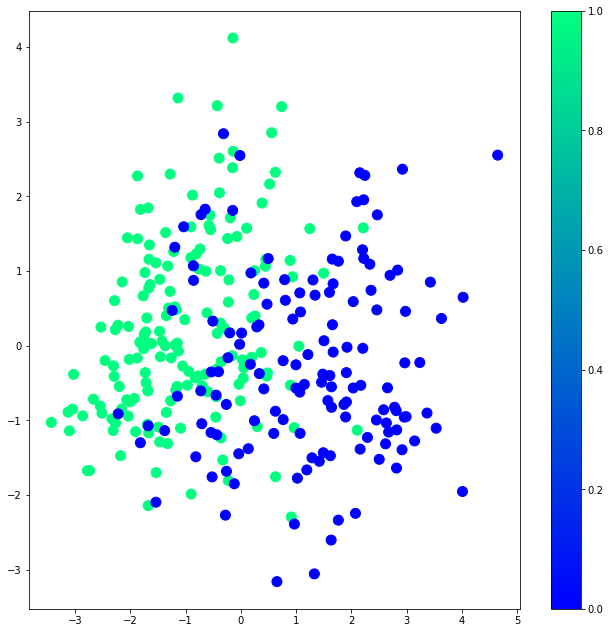

In [428]:
x = features_sc_pca[:, 0]
y = features_sc_pca[:, 1]
z = labels
plt.figure(figsize=(11,11))
cm = plt.get_cmap('winter')
sc = plt.scatter(x, y, c=z, cmap=cm, s=100)
plt.colorbar(sc)
plt.show()

In [429]:
#РАЗБИЕНИЕ ДАННЫХ НА ОБУЧЕНИЕ И ТЕСТ

In [430]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.2, random_state=42)

In [431]:
#ЕЩЕ ОДНО РАЗБИЕНИЕ ОБУЧЕНИЯ ДЛЯ ТЕСТИРОВАНИЯ МОДЕЛЕЙ

In [432]:
X_train_mini, X_test_mini, y_train_mini, y_test_mini = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [433]:
#ПОИСК МОДЕЛЕЙ ПОД F1 SCORE

In [283]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
svc=SVC()
mlpc=MLPClassifier()

In [284]:
alg=[lg,dt,rf,nb,knn,xgb,sgd,svc,mlpc]

In [285]:
for i in alg:
    i.fit(X_train_mini, y_train_mini)
    y_pred = i.predict(X_test_mini) 
    score=f1_score(y_test_mini, y_pred)
    print(score,i)

0.8461538461538461 LogisticRegression()
0.76 DecisionTreeClassifier()
0.8163265306122449 RandomForestClassifier()
0.7999999999999999 GaussianNB()
0.6 KNeighborsClassifier()
0.8461538461538461 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
0.0 SGDClassifier()
0.6785714285714286 SVC()
0.8148148148148148 MLPClassifier()


In [286]:
#XGBClassifier RandomForestClassifier LogisticRegression

In [287]:
for i in alg:
    i.fit(X_train_mini_cluster_df, y_train_mini)
    y_pred = i.predict(X_test_mini_cluster_df) 
    score=f1_score(y_test_mini, y_pred)
    print(score,i)

0.830188679245283 LogisticRegression()
0.8076923076923077 DecisionTreeClassifier()
0.823529411764706 RandomForestClassifier()
0.8076923076923077 GaussianNB()
0.8148148148148148 KNeighborsClassifier()
0.7843137254901961 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
0.84 SGDClassifier()
0.7924528301886792 SVC()
0.7843137254901961 ML

In [294]:
#ПОИСК ОПТИМАЛЬНЫХ ГИПЕРПАРАМЕТРОВ ДЛЯ ВЫБРАННОЙ МОДЕЛИ(F1_score)

In [295]:
stratifiedkfold = StratifiedKFold(n_splits=5)

In [296]:
pipe2 = Pipeline([('SS', StandardScaler()), ('PCA', PCA()), ('classifier', XGBClassifier())])
param_grid2 = [
    {'classifier__max_depth': [1, 2, 3, 4, 5, 6],
     'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
     'PCA__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
]
grid2 = GridSearchCV(pipe2, param_grid2, cv=stratifiedkfold, scoring='f1')
grid2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('SS', StandardScaler()), ('PCA', PCA()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fe...
                                                   

In [297]:
grid2.best_params_

{'PCA__n_components': 13,
 'classifier__learning_rate': 1,
 'classifier__max_depth': 4}

In [298]:
grid2.best_score_

0.8612652320456313

In [299]:
#СТЭКИНГ ЛУЧШИХ МОДЕЛЕЙ БЕЗ НАСТРОЙКИ

In [300]:
estimators_stack = [('xgb', make_pipeline(XGBClassifier())),
              ('rf', make_pipeline(RandomForestClassifier())),
              ('lg', make_pipeline(StandardScaler(), LogisticRegression()))]
clf1 = StackingClassifier(estimators= estimators_stack , final_estimator=LGBMClassifier())
clf1.fit(X_train_mini, y_train_mini)

StackingClassifier(estimators=[('xgb',
                                Pipeline(steps=[('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                        

In [301]:
y_pred_stack = clf1.predict(X_test_mini)

In [302]:
print(f1_score(y_test_mini, y_pred_stack))

0.7307692307692308


In [335]:
#ПОИСК ЛУЧШЕГО ЗНАЧЕНИЯ ПАРАМЕТРА n_components ДЛЯ PCA (10)

In [466]:
stack = [('xgb', XGBClassifier()), ('rf', RandomForestClassifier()), ('lg', LogisticRegression())]
clf_test = StackingClassifier(estimators= stack , final_estimator=LGBMClassifier())
scaler2 = StandardScaler()
X_train_new = scaler2.fit_transform(X_train_mini)
X_test_new = scaler2.transform(X_test_mini)

for i in range(8, 14):
    pca2 = PCA(n_components=i)
    X_train_new2 = pca2.fit_transform(X_train_new)
    X_test_new2 = pca2.transform(X_test_new)
    clf_test.fit(X_train_new2, y_train_mini)
    y_pred_test=clf_test.predict(X_test_new2)
    print(F"{i} components:")
    print(f1_score(y_test_mini, y_pred_test))

#10 components

8 components:
0.76
9 components:
0.84
10 components:
0.8518518518518519
11 components:
0.7692307692307692
12 components:
0.7450980392156864
13 components:
0.7547169811320754


In [305]:
#СТЭКИНГ ЛУЧШИХ МОДЕЛЕЙ (F1_score)

In [337]:
estimators = [('xgb', make_pipeline(StandardScaler(), PCA(n_components=10), XGBClassifier())),
              ('lg', make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression())),
              ('rf', make_pipeline(StandardScaler(), PCA(n_components=10), RandomForestClassifier()))]
clf2 = StackingClassifier(estimators= estimators , final_estimator=LGBMClassifier())
param_grid3 = {'xgb__xgbclassifier__learning_rate': [0.01, 0.1, 1, 10, 100],
                'xgb__xgbclassifier__max_depth': [1, 2, 3, 4],
               'xgb__xgbclassifier__n_estimators': [100, 200, 300],
                'lg__logisticregression__C': [0.01, 0.1, 1, 10, 100],               
               'rf__randomforestclassifier__max_depth': [1, 2, 3, 4]
              }
grid3 = GridSearchCV(estimator=clf2, param_grid=param_grid3, cv=stratifiedkfold, scoring='f1')
grid3.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=StackingClassifier(estimators=[('xgb',
                                                       Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('pca',
                                                                        PCA(n_components=10)),
                                                                       ('xgbclassifier',
                                                                        XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      callbacks=None,
                                                                                      colsample_bylevel=None,


In [338]:
clf2.get_params().keys()

dict_keys(['cv', 'estimators', 'final_estimator__boosting_type', 'final_estimator__class_weight', 'final_estimator__colsample_bytree', 'final_estimator__importance_type', 'final_estimator__learning_rate', 'final_estimator__max_depth', 'final_estimator__min_child_samples', 'final_estimator__min_child_weight', 'final_estimator__min_split_gain', 'final_estimator__n_estimators', 'final_estimator__n_jobs', 'final_estimator__num_leaves', 'final_estimator__objective', 'final_estimator__random_state', 'final_estimator__reg_alpha', 'final_estimator__reg_lambda', 'final_estimator__silent', 'final_estimator__subsample', 'final_estimator__subsample_for_bin', 'final_estimator__subsample_freq', 'final_estimator', 'n_jobs', 'passthrough', 'stack_method', 'verbose', 'xgb', 'lg', 'rf', 'xgb__memory', 'xgb__steps', 'xgb__verbose', 'xgb__standardscaler', 'xgb__pca', 'xgb__xgbclassifier', 'xgb__standardscaler__copy', 'xgb__standardscaler__with_mean', 'xgb__standardscaler__with_std', 'xgb__pca__copy', 'xgb

In [339]:
grid3.best_params_

{'lg__logisticregression__C': 10,
 'rf__randomforestclassifier__max_depth': 4,
 'xgb__xgbclassifier__learning_rate': 0.01,
 'xgb__xgbclassifier__max_depth': 4,
 'xgb__xgbclassifier__n_estimators': 300}

In [340]:
grid3.best_score_

0.8588432184328706

In [341]:
y_pred3 = grid3.predict(X_test)

In [357]:
print(f1_score(y_test, y_pred3))

0.8055555555555556


In [343]:
confusion3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix:\n{}".format(confusion3))

Confusion matrix:
[[18 10]
 [ 4 29]]


In [344]:
print(classification_report(y_test, y_pred3, target_names=["No attack", "Yes attack"]))

              precision    recall  f1-score   support

   No attack       0.82      0.64      0.72        28
  Yes attack       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



In [434]:
#ИТОГОВАЯ МОДЕЛЬ

In [457]:
estimators_res = [('xgb', make_pipeline(StandardScaler(), PCA(n_components=10), XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=300))),
              ('svc', make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(C=10))),
              ('mlp', make_pipeline(StandardScaler(), PCA(n_components=10), RandomForestClassifier(max_depth=4, n_estimators=100)))]
clf_res = StackingClassifier(estimators= estimators_res , final_estimator=LGBMClassifier())

In [458]:
clf_res.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('pca', PCA(n_components=10)),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
      

In [459]:
y_pred_res = clf_res.predict(X_test)

In [460]:
print(f1_score(y_test, y_pred_res))

0.7945205479452054


In [461]:
confusion_res = confusion_matrix(y_test, y_pred_res)
print("Confusion matrix:\n{}".format(confusion_res))

Confusion matrix:
[[17 11]
 [ 4 29]]


In [371]:
print(classification_report(y_test, y_pred_res, target_names=["No attack", "Yes attack"]))

              precision    recall  f1-score   support

   No attack       0.71      0.61      0.65        28
  Yes attack       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [383]:
# saving the model
import pickle
with open(r'C:\Users\kgayvoronskiy\webapp\model\model_heart_attack.pkl','wb') as file:
    pickle.dump(clf_res, file)